In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\ITZJA\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_uk = df[df['job_country'] == 'United Kingdom'].copy()
df_uk['job_posted_month'] = df_uk['job_posted_date'].dt.strftime('%B')
df_uk_pivot = df_uk.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_uk_pivot.reset_index(inplace=True)
df_uk_pivot['month_no'] =pd.to_datetime(df_uk_pivot['job_posted_month'], format='%B').dt.month
df_uk_pivot.sort_values(by='month_no', inplace=True)
df_uk_pivot.set_index('job_posted_month', inplace=True)
df_uk_pivot.drop(columns='month_no', inplace=True)

df_uk_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,46,3,1467,1253,1142,8,169,347,326,20
February,23,4,1051,1009,859,10,140,301,212,10
March,47,5,712,789,699,8,91,224,179,19
April,29,7,561,611,519,8,63,155,123,18
May,23,1,614,645,486,11,60,227,153,16
June,14,2,736,862,636,3,102,292,154,4
July,38,5,892,960,646,13,116,321,184,12
August,22,7,610,863,657,15,96,247,181,13
September,111,32,1112,1191,898,51,139,320,221,116


In [4]:
df_uk_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')

In [6]:
df_uk_merged = df_uk_pivot.merge(df_uk_software_pivot, on='job_posted_month')

In [11]:
top_5 = (
    df_uk_merged
    .sum()
    .sort_values(ascending=False)
    .head()
    .index
    .to_list()
)

<function matplotlib.pyplot.show(close=None, block=None)>

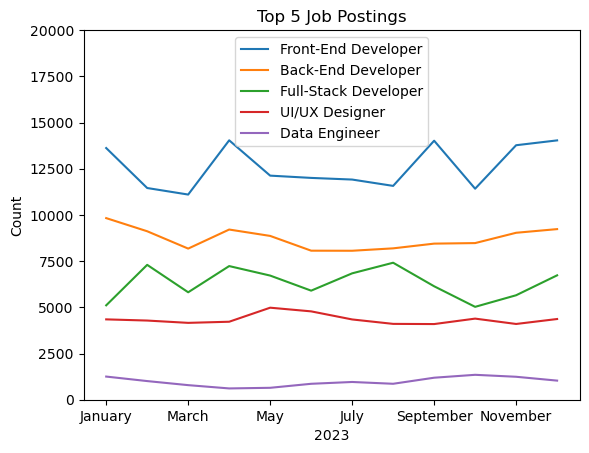

In [16]:
df_uk_merged[top_5].plot(kind='line')
plt.title('Top 5 Job Postings')
plt.xlabel('2023')
plt.ylabel('Count')
plt.ylim(0,20_000)
plt.legend()
plt.show